# Leuven2,X-n1001-k43の詳細調査


Leuven2とX-n1001-k43は各クラスタの都市の数が多く経路長がばらつきが出るので10回解く

In [3]:
import json

def read_total_distance_from_solve(json_path):
    """
    solve*.json の構造:
    {
      "<dynamic-key>": {
        "data": {
          "route": [...],
          "total_time": ...,
          "execution_time": ...,
          "response_time": ...,
          "total_distances": 2126.0
        }
      }
    }
    から total_distances を float で返す（無ければ None）。
    """
    with open(json_path, "r") as f:
        obj = json.load(f)

    if not isinstance(obj, dict) or not obj:
        return None

    # 動的キー（先頭の1件）を拾う
    top_key = next(iter(obj))
    data = obj.get(top_key, {}).get("data", {})

    # キーのゆらぎに一応対応
    for k in ("total_distances", "total_distance", "distance"):
        if k in data:
            try:
                return float(data[k])
            except (TypeError, ValueError):
                return None

    return None


In [4]:
import os, glob
import pandas as pd

base_dir = "/home/toshiya1048/experiments/repeat_leuven_x1001"

# すべての QA ディレクトリを取得
qa_dirs = sorted(glob.glob(os.path.join(base_dir, "**", "QA"), recursive=True))
print(f"found {len(qa_dirs)} QA dirs")

# 各フォルダを処理
rows = []
for qa_dir in qa_dirs:
    solve_files = sorted(glob.glob(os.path.join(qa_dir, "solve*.json")))
    total = 0.0
    valid = 0
    for fp in solve_files:
        v = read_total_distance_from_solve(fp)
        if v is not None:
            total += v
            valid += 1
    rows.append({
        "qa_dir": os.path.relpath(qa_dir, base_dir),
    
        "sum_total_distances": total
    })

df_all = pd.DataFrame(rows).sort_values("qa_dir").reset_index(drop=True)
df_all


found 20 QA dirs


,qa_dir,sum_total_distances
0,202511051104/knapsack/Leuven2vrp/QA,151564.0
1,202511051104/knapsack/X-n1001-k43vrp/QA,84119.0
2,202511051127/knapsack/Leuven2vrp/QA,152568.0
3,202511051127/knapsack/X-n1001-k43vrp2/QA,84211.0
4,202511051155/knapsack/Leuven2vrp/QA,152154.0
5,202511051155/knapsack/X-n1001-k43vrp/QA,84036.0
6,202511051434/knapsack/Leuven2vrp/QA,150995.0
7,202511051434/knapsack/X-n1001-k43vrp/QA,84138.0
8,202511051457/knapsack/Leuven2vrp/QA,152071.0
9,202511051457/knapsack/X-n1001-k43vrp/QA,84147.0


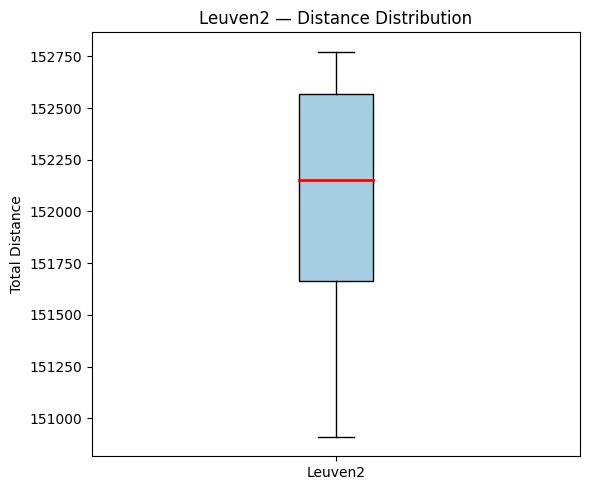

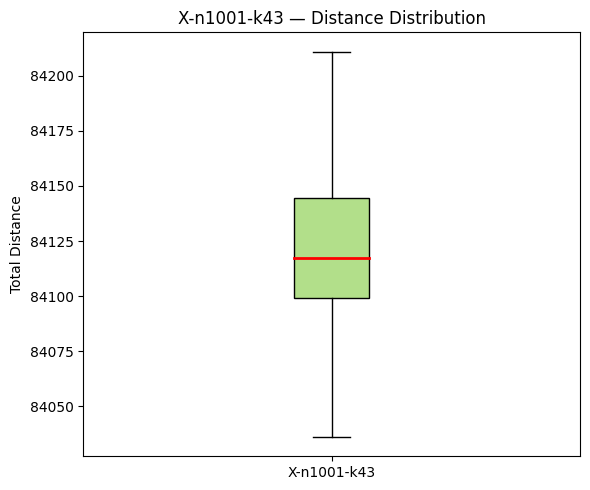

✅ 画像を保存しました：
- /home/toshiya1048/dev/QA_knap/analysis/plots_repeat10/Leuven2_boxplot.png
- /home/toshiya1048/dev/QA_knap/analysis/plots_repeat10/Xn1001_boxplot.png


In [5]:
# --- Leuven2 と X-n1001-k43 の距離分布をそれぞれ個別に箱ひげ図で表示・保存 ---
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from pathlib import Path

# 元データ
data = """id path dist
1 202511051104/knapsack/X-n1001-k43vrp/QA 84119.0
2 202511051127/knapsack/Leuven2vrp/QA 152568.0
3 202511051127/knapsack/X-n1001-k43vrp2/QA 84211.0
4 202511051155/knapsack/Leuven2vrp/QA 152154.0
5 202511051155/knapsack/X-n1001-k43vrp/QA 84036.0
6 202511051434/knapsack/Leuven2vrp/QA 150995.0
7 202511051434/knapsack/X-n1001-k43vrp/QA 84138.0
8 202511051457/knapsack/Leuven2vrp/QA 152071.0
9 202511051457/knapsack/X-n1001-k43vrp/QA 84147.0
10 202511051520/knapsack/Leuven2vrp/QA 151665.0
11 202511051520/knapsack/X-n1001-k43vrp/QA 84105.0
12 202511051542/knapsack/Leuven2vrp/QA 152402.0
13 202511051542/knapsack/X-n1001-k43vrp/QA 84055.0
14 202511051605/knapsack/Leuven2vrp/QA 152773.0
15 202511051605/knapsack/X-n1001-k43vrp/QA 84168.0
16 202511051627/knapsack/Leuven2vrp/QA 150909.0
17 202511051627/knapsack/X-n1001-k43vrp/QA 84116.0
18 202511051650/knapsack/Leuven2vrp/QA 152732.0
19 202511051650/knapsack/X-n1001-k43vrp/QA 84097.0
"""

# データ整形
df = pd.read_csv(StringIO(data), sep=r"\s+", engine="python")
df["instance"] = df["path"].str.extract(r"/(Leuven2vrp|X-n1001-k43vrp2?|X-n1001-k43vrp)/")[0]
df["instance"] = df["instance"].replace({"X-n1001-k43vrp2": "X-n1001-k43vrp"})
df = df[df["instance"].isin(["Leuven2vrp", "X-n1001-k43vrp"])]

# 出力フォルダ
OUT_DIR = Path("plots_repeat10")
OUT_DIR.mkdir(exist_ok=True)

# === Leuven2 ===
leuven = df[df["instance"] == "Leuven2vrp"]["dist"]
plt.figure(figsize=(6, 5))
plt.boxplot(leuven, patch_artist=True,
            boxprops=dict(facecolor="#a6cee3", color="black"),
            medianprops=dict(color="red", linewidth=2))
plt.title("Leuven2 — Distance Distribution")
plt.ylabel("Total Distance")
plt.xticks([1], ["Leuven2"])
plt.tight_layout()
out_leuven = OUT_DIR / "Leuven2_boxplot.png"
plt.savefig(out_leuven, dpi=300)
plt.show()

# === X-n1001-k43 ===
xn1001 = df[df["instance"] == "X-n1001-k43vrp"]["dist"]
plt.figure(figsize=(6, 5))
plt.boxplot(xn1001, patch_artist=True,
            boxprops=dict(facecolor="#b2df8a", color="black"),
            medianprops=dict(color="red", linewidth=2))
plt.title("X-n1001-k43 — Distance Distribution")
plt.ylabel("Total Distance")
plt.xticks([1], ["X-n1001-k43"])
plt.tight_layout()
out_xn = OUT_DIR / "Xn1001_boxplot.png"
plt.savefig(out_xn, dpi=300)
plt.show()

print(f"✅ 画像を保存しました：\n- {out_leuven.resolve()}\n- {out_xn.resolve()}")
